In [1]:
import lazy_pipeline as lpipe

Cloning into 'OSDA_course'...


C:\Users\mixas\OSDA_course\lazy_fca


In [2]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
test_df = pd.read_csv('heart_failure_clinical_records_dataset.csv') 

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
test_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
test_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
test_size = 0.1
numerical_names = {'age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'}

In [8]:
test_df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
test_df['age'].min()

40.0

In [10]:
new_data = dict()

In [11]:
new_data['age40_55'] = (test_df['age']<=55).astype(int)
new_data['age56_70'] = ((test_df['age']>55) & (test_df['age']<=70)).astype(int)
new_data['age71_95'] = (test_df['age']>70).astype(int)

In [12]:
new_data['male'] = (test_df['sex']==1).astype(int)
new_data['female'] = (test_df['sex']==0).astype(int)

In [13]:
new_data['creatinine_phosphokinase(116.5)'] = (test_df['creatinine_phosphokinase']==116.5).astype(int)
new_data['creatinine_phosphokinase(250)'] = (test_df['creatinine_phosphokinase']==250).astype(int)
new_data['creatinine_phosphokinase(582)'] = (test_df['creatinine_phosphokinase']==582).astype(int)
new_data['creatinine_phosphokinase(7861)'] = (test_df['creatinine_phosphokinase']==7861).astype(int)

In [14]:
new_data['ejection_fraction14_40'] = (test_df['ejection_fraction']<=40).astype(int)
new_data['ejection_fraction41_80'] = ((test_df['ejection_fraction']>40) & (test_df['ejection_fraction']<=80)).astype(int)

In [15]:
new_data['platelets25100_230000'] = (test_df['platelets']<=230000).astype(int)
new_data['platelets230001_300000'] = ((test_df['platelets']>230000) & (test_df['platelets']<=300000)).astype(int)
new_data['platelets300001_850000'] = ((test_df['platelets']>300000) & (test_df['platelets']<=850000)).astype(int)

In [16]:
new_data['anaemia0'] = (test_df['anaemia']==0 ).astype(int)
new_data['anaemia1'] = (test_df['anaemia']==1 ).astype(int)

In [17]:
new_data['diabetes0'] = (test_df['diabetes']==0 ).astype(int)
new_data['diabetes1'] = (test_df['diabetes']==1 ).astype(int)

In [18]:
new_data['high_blood_pressure0'] = (test_df['high_blood_pressure']==0 ).astype(int)
new_data['high_blood_pressure1'] = (test_df['high_blood_pressure']==1 ).astype(int)

In [19]:
new_data['serum_creatinine0.5_1'] = (test_df['serum_creatinine']<=1).astype(int)
new_data['serum_creatinine1.1_1.3'] = ((test_df['serum_creatinine']>1) & (test_df['serum_creatinine']<=1.3)).astype(int)
new_data['serum_creatinine1.4_9.4'] = ((test_df['serum_creatinine']>1.3) & (test_df['serum_creatinine']<=9.4)).astype(int)

In [20]:
new_data['serum_sodium113_130'] = (test_df['serum_sodium']<=130).astype(int)
new_data['serum_sodium131_148'] = ((test_df['serum_sodium']>130) & (test_df['serum_sodium']<=148)).astype(int)

In [21]:
new_data['smoking0'] = (test_df['smoking']==0 ).astype(int)
new_data['smoking1'] = (test_df['smoking']==1 ).astype(int)

In [22]:
new_data['time4_100'] = (test_df['time']<=100).astype(int)
new_data['time101_200'] = ((test_df['time']>100) & (test_df['time']<=200)).astype(int)
new_data['time201_285'] = ((test_df['time']>200) & (test_df['time']<=285)).astype(int)

In [23]:
new_data['DEATH_EVENT'] = test_df['DEATH_EVENT'].astype(bool)

In [24]:
df = pd.DataFrame(new_data)

In [25]:
df = df.sample(frac=1).reset_index(drop=True)

In [26]:
df

,age40_55,age56_70,age71_95,male,female,creatinine_phosphokinase(116.5),creatinine_phosphokinase(250),creatinine_phosphokinase(582),creatinine_phosphokinase(7861),ejection_fraction14_40,...,serum_creatinine1.1_1.3,serum_creatinine1.4_9.4,serum_sodium113_130,serum_sodium131_148,smoking0,smoking1,time4_100,time101_200,time201_285,DEATH_EVENT
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,False
1,0,1,0,1,0,0,0,0,0,1,...,0,1,1,0,0,1,0,1,0,False
2,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,False
3,0,1,0,1,0,0,0,0,0,1,...,0,1,0,1,1,0,0,0,1,False
4,0,1,0,0,1,0,0,0,0,1,...,0,1,0,1,1,0,1,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,1,0,0,1,0,0,0,0,1,...,0,1,0,1,1,0,0,0,1,False
295,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,False
296,1,0,0,0,1,0,0,0,0,1,...,0,1,1,0,1,0,0,1,0,True
297,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,False


In [27]:
df = df.sample(frac=1).reset_index(drop=True)

In [28]:
y_name = 'DEATH_EVENT'

In [29]:
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()

(299, 59)


,age40_55: 0,age40_55: 1,age56_70: 0,age56_70: 1,age71_95: 0,age71_95: 1,male: 0,male: 1,female: 0,female: 1,...,smoking0: 0,smoking0: 1,smoking1: 0,smoking1: 1,time4_100: 0,time4_100: 1,time101_200: 0,time101_200: 1,time201_285: 0,time201_285: 1
0,True,False,False,True,True,False,True,False,False,True,...,True,False,False,True,False,True,True,False,True,False
1,True,False,False,True,True,False,True,False,False,True,...,False,True,True,False,False,True,True,False,True,False
2,True,False,False,True,True,False,True,False,False,True,...,False,True,True,False,False,True,True,False,True,False
3,True,False,True,False,False,True,False,True,True,False,...,False,True,True,False,False,True,True,False,True,False
4,True,False,False,True,True,False,False,True,True,False,...,False,True,True,False,True,False,False,True,True,False


In [30]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]  # Order y to follow the order of rows from X

In [31]:
X

,age40_55: 0,age40_55: 1,age56_70: 0,age56_70: 1,age71_95: 0,age71_95: 1,male: 0,male: 1,female: 0,female: 1,...,smoking0: 0,smoking0: 1,smoking1: 0,smoking1: 1,time4_100: 0,time4_100: 1,time101_200: 0,time101_200: 1,time201_285: 0,time201_285: 1
281,False,True,True,False,True,False,True,False,False,True,...,False,True,True,False,True,False,False,True,True,False
265,True,False,True,False,False,True,False,True,True,False,...,False,True,True,False,True,False,False,True,True,False
164,True,False,False,True,True,False,False,True,True,False,...,True,False,False,True,False,True,True,False,True,False
9,True,False,True,False,False,True,True,False,False,True,...,False,True,True,False,True,False,True,False,False,True
77,False,True,True,False,True,False,False,True,True,False,...,False,True,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,False,True,True,False,True,False,False,True,True,False,...,True,False,False,True,False,True,True,False,True,False
71,True,False,False,True,True,False,True,False,False,True,...,False,True,True,False,False,True,True,False,True,False
106,True,False,True,False,False,True,True,False,False,True,...,False,True,True,False,True,False,True,False,False,True
270,False,True,True,False,True,False,True,False,False,True,...,False,True,True,False,True,False,False,True,True,False


In [32]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'age40_55: 1',
 'age56_70: 0',
 'age71_95: 0',
 'anaemia0: 0',
 'anaemia1: 1',
 'creatinine_phosphokinase(116.5): 0',
 'creatinine_phosphokinase(250): 0',
 'creatinine_phosphokinase(582): 0',
 'creatinine_phosphokinase(7861): 0',
 'diabetes0: 0',
 'diabetes1: 1',
 'ejection_fraction14_40: 1',
 'ejection_fraction41_80: 0',
 'female: 1',
 'high_blood_pressure0: 1',
 'high_blood_pressure1: 0',
 'male: 0',
 'platelets230001_300000: 0',
 'platelets25100_230000: 1',
 'platelets300001_850000: 0',
 'serum_creatinine0.5_1: 1',
 'serum_creatinine1.1_1.3: 0',
 'serum_creatinine1.4_9.4: 0',
 'serum_sodium113_130: 0',
 'serum_sodium131_148: 1',
 'smoking0: 1',
 'smoking1: 0',
 'time101_200: 1',
 'time201_285: 0',
 'time4_100: 0'}

In [33]:
y = y.values.tolist()

In [34]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(29, 270)

In [35]:
y_test = y[n_train:]

In [36]:
X_bin

[{'age40_55: 1',
  'age56_70: 0',
  'age71_95: 0',
  'anaemia0: 0',
  'anaemia1: 1',
  'creatinine_phosphokinase(116.5): 0',
  'creatinine_phosphokinase(250): 0',
  'creatinine_phosphokinase(582): 0',
  'creatinine_phosphokinase(7861): 0',
  'diabetes0: 0',
  'diabetes1: 1',
  'ejection_fraction14_40: 1',
  'ejection_fraction41_80: 0',
  'female: 1',
  'high_blood_pressure0: 1',
  'high_blood_pressure1: 0',
  'male: 0',
  'platelets230001_300000: 0',
  'platelets25100_230000: 1',
  'platelets300001_850000: 0',
  'serum_creatinine0.5_1: 1',
  'serum_creatinine1.1_1.3: 0',
  'serum_creatinine1.4_9.4: 0',
  'serum_sodium113_130: 0',
  'serum_sodium131_148: 1',
  'smoking0: 1',
  'smoking1: 0',
  'time101_200: 1',
  'time201_285: 0',
  'time4_100: 0'},
 {'age40_55: 0',
  'age56_70: 0',
  'age71_95: 1',
  'anaemia0: 0',
  'anaemia1: 1',
  'creatinine_phosphokinase(116.5): 0',
  'creatinine_phosphokinase(250): 0',
  'creatinine_phosphokinase(582): 0',
  'creatinine_phosphokinase(7861): 0',
 

In [37]:
%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

CPU times: total: 0 ns
Wall time: 0 ns


Predicting step by step: 100%|██████████████████████████████████████████████████████| 299/299 [00:02<00:00, 116.54it/s]


In [38]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|█████████████████████████████████████████████████████| 299/299 [00:00<00:00, 4382.24it/s]

CPU times: total: 46.9 ms
Wall time: 63.5 ms


In [39]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

C:\Users\mixas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\mixas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\mixas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\mixas\anaconda3\Lib\site-packages\skl

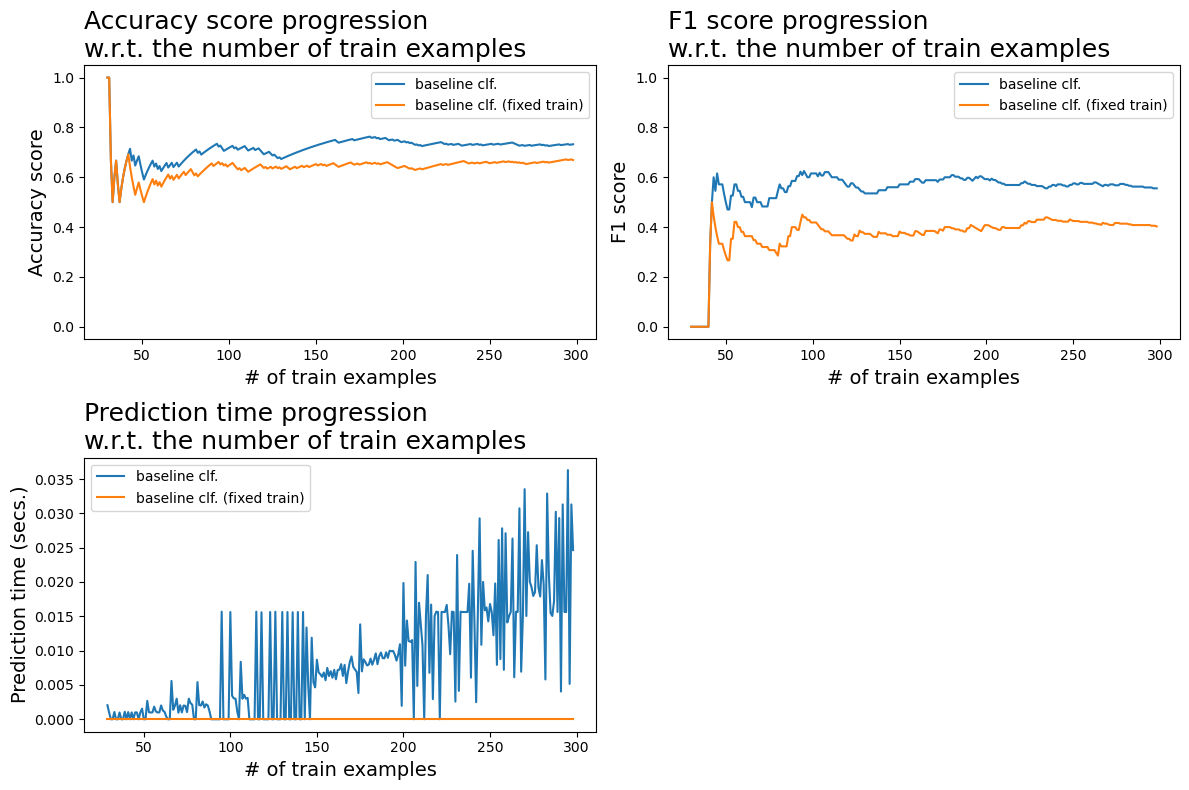

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1) 


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), size=14)
    ax.legend()
    
axs[1,1].set_axis_off()    

plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

In [41]:
sum(score_vals['accuracy_score'])/len(score_vals['accuracy_score'])*100

71.4640811945598

In [42]:
sum(score_vals['f1_score'])/len(score_vals['f1_score'])*100

54.42533517131669

In [43]:
n_train = int(len(X)*0.9)
n_test = len(X) - n_train
X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]

In [44]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

from sklearn import metrics

acc =  metrics.accuracy_score(y_test, y_pred) * 100

In [45]:
acc

63.33333333333333

In [46]:
from sklearn import tree
from sklearn.metrics import accuracy_score
DF = tree.DecisionTreeClassifier(random_state=42)
DF = DF.fit(X_train, y_train)
y_pred = DF.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100

In [47]:
acc

53.333333333333336

In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=6)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100


In [57]:
acc

60.0

In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100

In [59]:
acc

76.66666666666667